In [159]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_1samp

In [136]:
# Read data
data = pd.read_table('data.txt')

husband = data['Husband']
wife = data['Wife']

(96, 1)

In [120]:
# (a) Compute the covariance between the heights of the husbands and wifes.

n = len(husband)
husband_mean = np.mean(husband)
wife_mean = np.mean(wife)
covariance = np.inner((husband - husband_mean), (wife - wife_mean)) / (n-1)

print('Mean of heights of wifes (cm) =', wife_mean)
print('Mean of heights of husbands (cm) =', husband_mean)
print('Covariance between the heights (cm) =', covariance) 


(96,)

In [102]:
# (b) What would the covariance be if heights were measured in inches rather than in centimeters?

""" 1 inch = 2.54 centimeters"""
husband_inch = husband/2.54 
wife_inch = wife/2.54

husband_mean_inch = np.mean(husband_inch)
wife_mean_inch = np.mean(wife_inch)
covariance_inch = np.inner((husband_inch - husband_mean_inch), (wife_inch - wife_mean_inch)) / (n-1)

print('Mean of heights of wifes (inch) =', wife_mean_inch)
print('Mean of heights of husbands (inch) =', husband_mean_inch)
print('Covariance between the heights (inch) =', covariance_inch)

# Let's see the relationship between covariance and covariance_inch
factor = covariance / covariance_inch

print('Covariance (cm) / covariance (inch) =', factor) 
print('Square root of covariance (cm) / covariance (inch) =', np.sqrt(factor)) 

# It does not find the factor exactly 2.54 due to floating point arithmetic error. No problem.
# We see that the covariance is sensitive to the unit in which we measure the data.

Mean of heights of wifes (inch) = 64.52591863517061
Mean of heights of husbands (inch) = 68.63106955380577
Covariance between the heights (inch) = 10.759027000510143
Covariance (cm) / covariance (inch) = 6.451599999999998
Square root of covariance (cm) / covariance (inch) = 2.5399999999999996


In [103]:
# (c) Compute the correlation coefficient between the heights of the husband and wife.

standard_deviation_husband = np.sqrt(np.inner((husband - husband_mean), (husband - husband_mean))/(n-1))
standard_deviation_wife = np.sqrt(np.inner((wife - wife_mean), (wife - wife_mean))/(n-1))

correlation_coefficient = covariance/(standard_deviation_husband*standard_deviation_wife)

print('Correlation coefficient between heights (cm) =', correlation_coefficient)



Correlation coefficient between heights (cm) = 0.7633863969860971


In [104]:
# (d) What would the correlation be if heights were measured in inches rather than in centimeters?

standard_deviation_husband_inch = np.sqrt(np.inner((husband_inch - husband_mean_inch), (husband_inch - husband_mean_inch))/(n-1))
standard_deviation_wife_inch = np.sqrt(np.inner((wife_inch - wife_mean_inch), (wife_inch - wife_mean_inch))/(n-1))

correlation_coefficient_inch = covariance_inch / (standard_deviation_husband_inch * standard_deviation_wife_inch)

print('Correlation coefficient between heights (inch) =', correlation_coefficient_inch)

# Correlation cofficient is not effected by the change of the unit.

Correlation coefficient between heights (inch) = 0.7633863969860973


In [162]:
# (e) What would the correlation be if every man married a woman exactly 5 centimeters shorter than him?

# Define a new column for women 5cm shorter than men. 
new_wife = husband - 5
new_wife_mean = np.mean(new_wife)

covariance_new = np.inner((husband - husband_mean), (new_wife - new_wife_mean)) / (n-1)

standard_deviation_new_wife = np.sqrt(np.inner((new_wife - new_wife_mean), (new_wife - new_wife_mean))/(n-1))

correlation_coefficient_new = covariance_new / (standard_deviation_husband * standard_deviation_new_wife)

print('Correlation coefficient for the marriage with a woman exactly 5 cm shorter =', correlation_coefficient_new)

# Perfectly Correlated!! It is not exactly 1 due to the floating point arithmetic error.

Correlation coefficient for the marriage with a woman exactly 5 cm shorter = 1.0000000000000002


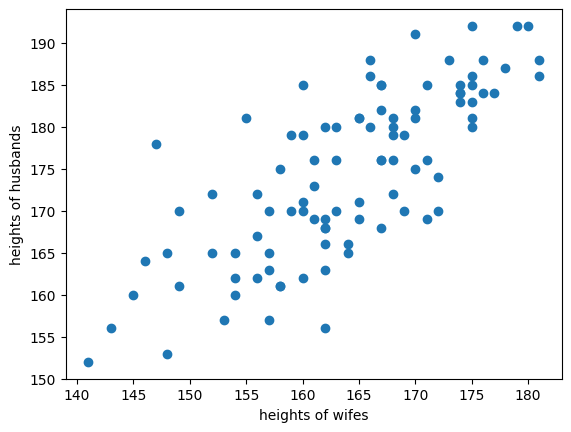

In [113]:
# (f) We wish to fit a regression model relating the heights of husbands and wives. 
#     Which one of the two variables would you choose as the response variable? Justify your answer.

# We found Cor(Y,X)=0.7633863969860973. It means that wife variable X is a useful predictor of husband variable Y.
# It is sometimes possible to find |Cor(Y,X)| high, but we may not have a linear relationship. 
# We justify this by plotting the data.

plt.scatter(wife, husband)
plt.xlabel('heights of wifes')
plt.ylabel('heights of husbands')
plt.show()

# The following figure shows us a linear relationship between X and Y.

In [163]:
# (g) Using your choice of the response variable in Exercise 2.1O(f), 
#     test the null hypothesis that the slope is zero.

from scipy.stats import linregress
beta_1, beta_0, r_value, p_value, std_err = linregress(wife, husband)
p_value

t_stat, p_value_slope = ttest_1samp(wife - beta_1 * husband, 0)
p_value_slope

1.2421203097367699e-50

In [ ]:
# (h) Using your choice of the response variable in 2.1O (f), test the null hypothesis that the intercept is zero.


